In [34]:
import sys

import numpy as np
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plot
import scipy.fftpack
from scipy.signal import butter,filtfilt

Load all data formats and check if they looks ok. All with same apmplitude and
frquency but in different saved binary formats

# Load data u8


In [110]:
SAMPLE_TOTAL=256

#FILE_IN_S8="./sin/out.s8"
FILE_IN_S8="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.s8"
FILE_IN_CS8="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.cs8"
FILE_IN_U8="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.u8"
FILE_IN_CU8="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.cu8"
FILE_IN_S16="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.s16"
FILE_IN_CS16="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.cs16"
FILE_IN_U16="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.u16"
FILE_IN_CU16="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.cu16"
FILE_IN_S16Q11="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.s16q11"
FILE_IN_CS16Q11="/Users/jackyjack/Downloads/dsp_tests/sin_2025_05/out.cs16q11"
#FILE_IN2="../prog/c/siggen/out.bit16"
#sample1 = np.fromfile(FILE_IN1, np.int16, count=SAMPLE_TOTAL).astype(np.float32).view(np.complex64)
sample_u8 = np.fromfile(FILE_IN_U8, np.uint8, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_cu8 = np.fromfile(FILE_IN_CU8, np.uint8, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_s8 = np.fromfile(FILE_IN_S8, np.int8, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_cs8 = np.fromfile(FILE_IN_CS8, np.int8, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_s16 = np.fromfile(FILE_IN_S16, np.int16, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_cs16 = np.fromfile(FILE_IN_CS16, np.int16, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_u16 = np.fromfile(FILE_IN_U16, np.uint16, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_cu16 = np.fromfile(FILE_IN_CU16, np.uint16, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_s16q11 = np.fromfile(FILE_IN_S16Q11, np.int16, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
sample_cs16q11 = np.fromfile(FILE_IN_CS16Q11, np.int16, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)                                                                                              
print("u8 sample num %d\n"%(len(sample_u8)))
print("cu8 sample num %d\n"%(len(sample_cu8)))
print("s8 sample num %d\n"%(len(sample_s8)))
print("cs8 sample num %d\n"%(len(sample_cs8)))
print("s16 sample num %d\n"%(len(sample_s16)))
print("cs16 sample num %d\n"%(len(sample_cs16)))
print("u16 sample num %d\n"%(len(sample_u16)))
print("cu16 sample num %d\n"%(len(sample_cu16)))
print("s16q11 sample num %d\n"%(len(sample_s16q11)))
print("cs16q11 sample num %d\n"%(len(sample_cs16q11)))

u8 sample num 256

cu8 sample num 256

s8 sample num 256

cs8 sample num 256

s16 sample num 256

cs16 sample num 256

u16 sample num 256

cu16 sample num 256

s16q11 sample num 256

cs16q11 sample num 256



# Load data s8

# Load data s16

# Load data sc16q11

# Draw signal s8

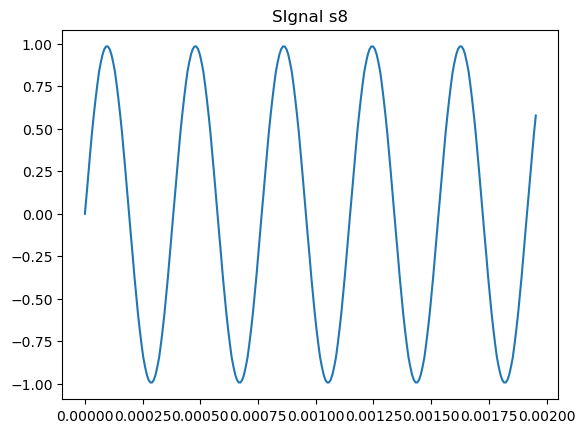

In [40]:
#signed 8
#scale 
sample_s8 = np.divide(sample_s8,128.0)
xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL*2),SAMPLE_TOTAL)
plot.plot(xf,sample_s8)
plot.title("SIgnal s8")
plot.show()

## Draw signal cs8

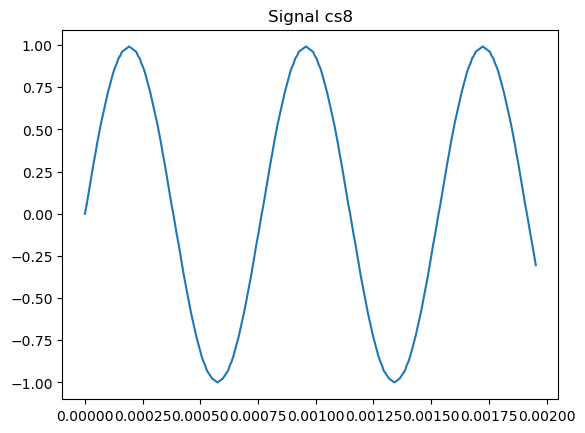

In [114]:
#complex signed 8
#scale 
sample_cs8 = np.divide(sample_cs8,128)
#sample_cs8 = np.subtract(sample_cs8,0.0)
xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL*2),SAMPLE_TOTAL)
plot.plot(xf,sample_cs8)
plot.title("Signal cs8")
plot.show()

## Draw signal u8

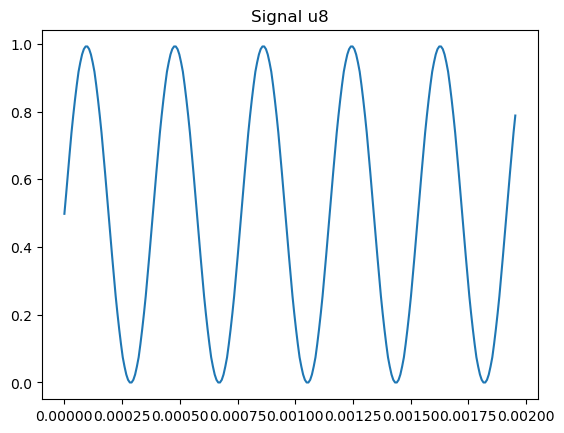

In [61]:
# unsigned 8
#scale
sample_u8 = np.divide(sample_u8,255)
xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL*2),SAMPLE_TOTAL)
plot.plot(xf,sample_u8)
plot.title("Signal u8")
plot.show()


## Draw cu8

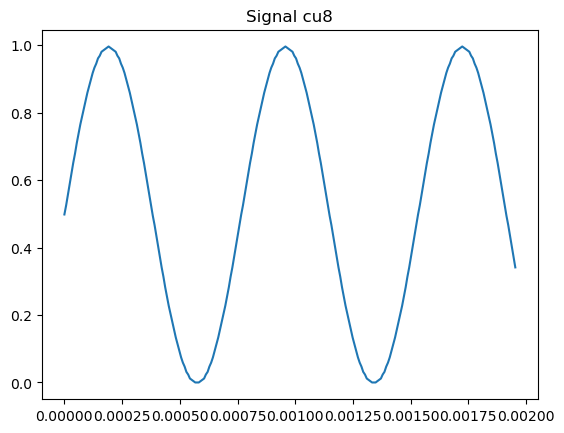

In [116]:
# comples unsigned 8
#scale
sample_cu8 = np.divide(sample_cu8,255)
xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL*2),SAMPLE_TOTAL)
plot.plot(xf,sample_cu8)
plot.title("Signal cu8")
plot.show()

## Draw signal s16/c16 and u16/cu16

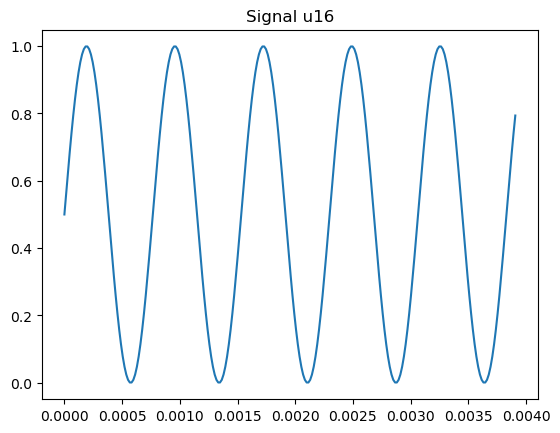

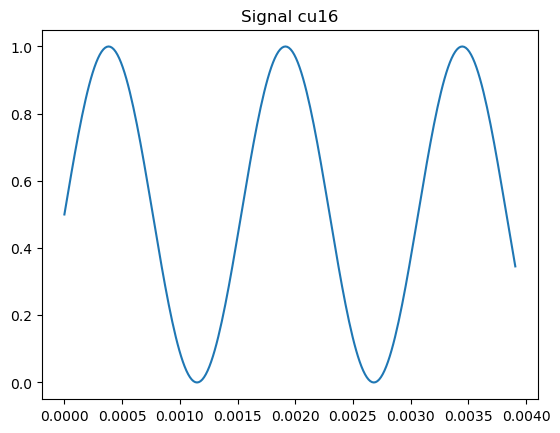

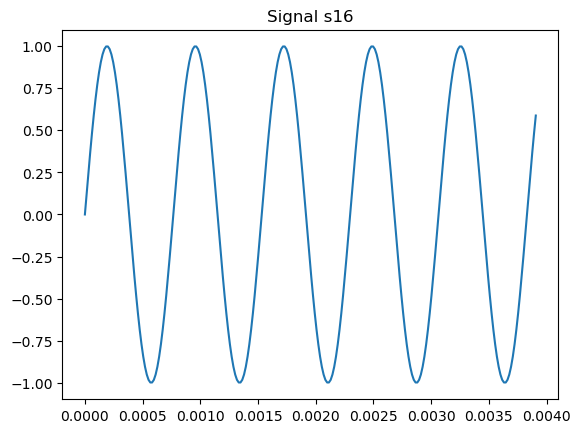

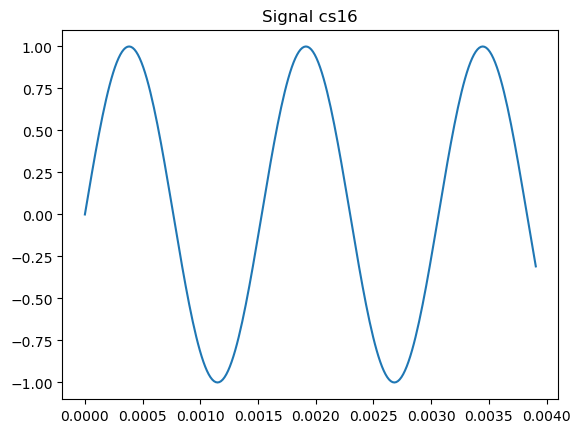

In [118]:
xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL),SAMPLE_TOTAL)
sample_u16 = np.divide(sample_u16,65535)
plot.plot(xf,sample_u16)
plot.title("Signal u16")
plot.show()

xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL),SAMPLE_TOTAL)
sample_cu16 = np.divide(sample_cu16,65535)
plot.plot(xf,sample_cu16)
plot.title("Signal cu16")
plot.show()

xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL),SAMPLE_TOTAL)
sample_s16 = np.divide(sample_s16,32767)
plot.plot(xf,sample_s16)
plot.title("Signal s16")
plot.show()

xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL),SAMPLE_TOTAL)
sample_cs16 = np.divide(sample_cs16,32767)
plot.plot(xf,sample_cs16)
plot.title("Signal cs16")
plot.show()

## Draw signal s16q11/cs16q11

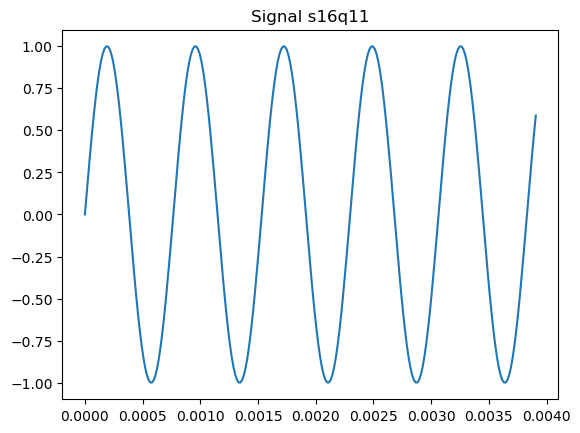

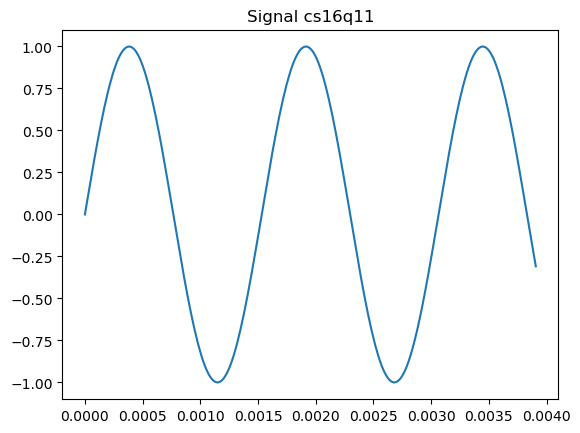

In [120]:
xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL),SAMPLE_TOTAL)
sample_s16q11 = np.divide(sample_s16q11,2048)
plot.plot(xf,sample_s16q11)
plot.title("Signal s16q11")
plot.show()

xf = np.linspace(0.0,1.0/(SAMPLE_TOTAL),SAMPLE_TOTAL)
sample_cs16q11 = np.divide(sample_cs16q11,2048)
plot.plot(xf,sample_cs16q11)
plot.title("Signal cs16q11")
plot.show()

## Draw FFT u8/cu8 and s8/cs8

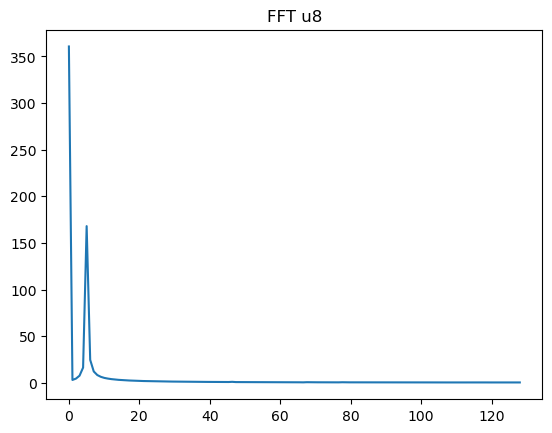

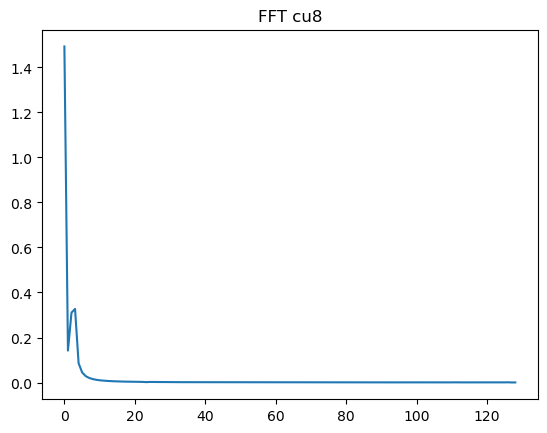

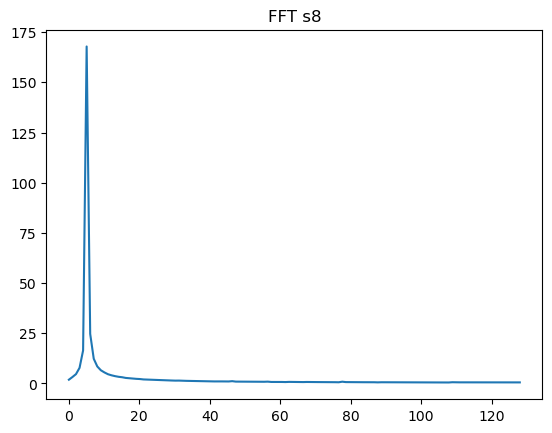

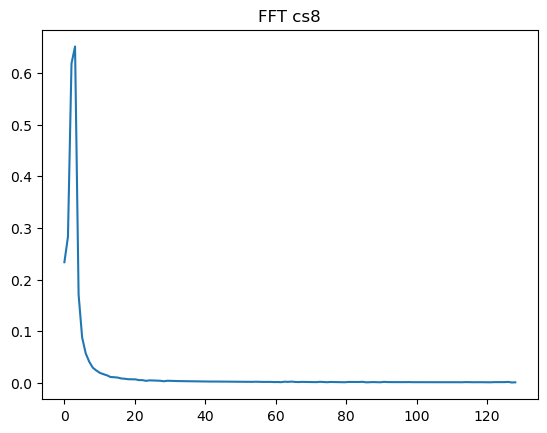

In [122]:
yfft = scipy.fftpack.fft(sample_u8)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT u8")
plot.show()

yfft = scipy.fftpack.fft(sample_cu8)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT cu8")
plot.show()

yfft = scipy.fftpack.fft(sample_s8)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT s8")
plot.show()

yfft = scipy.fftpack.fft(sample_cs8)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT cs8")
plot.show()

## Draw FFT u16/cu16 and s16/cs16

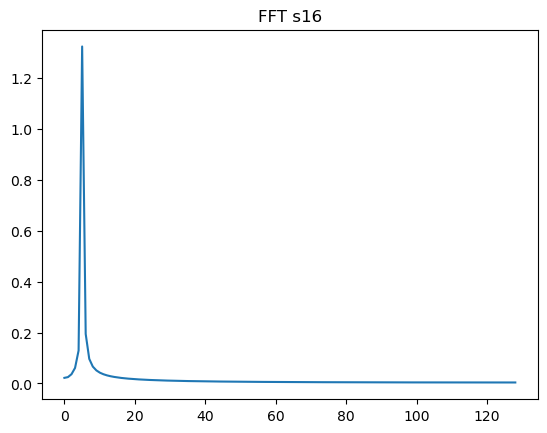

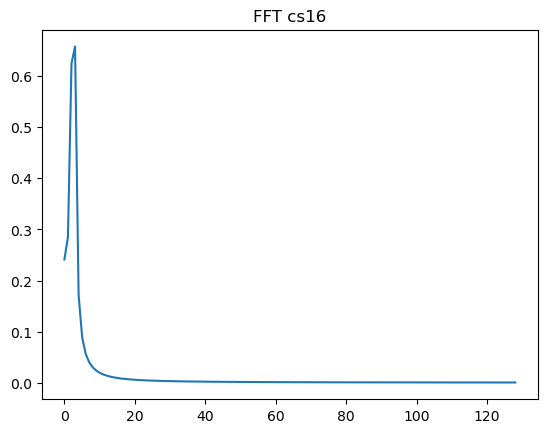

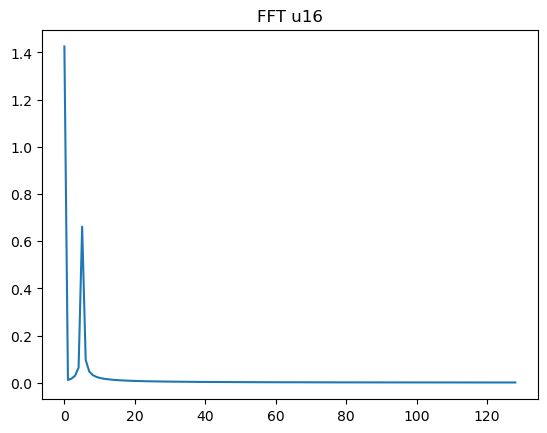

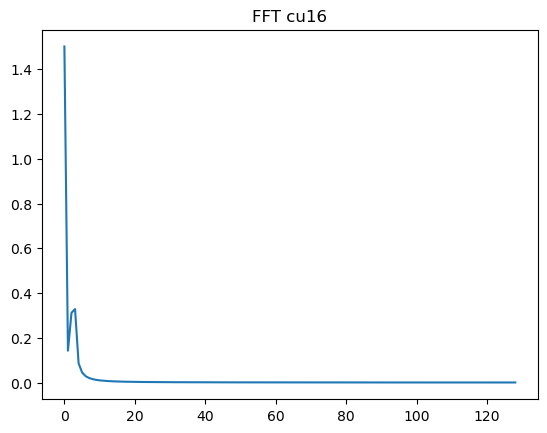

In [124]:
yfft = scipy.fftpack.fft(sample_s16)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT s16")
plot.show()

yfft = scipy.fftpack.fft(sample_cs16)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT cs16")
plot.show()

yfft = scipy.fftpack.fft(sample_u16)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT u16")
plot.show()

yfft = scipy.fftpack.fft(sample_cu16)
xf = np.linspace(0.0, 1.0/(2.0*(1.0/SAMPLE_TOTAL)), SAMPLE_TOTAL//2)
#print(len(yfft))
#print(len(yfft))
plot.plot(xf,2.0/SAMPLE_TOTAL * np.abs(yfft[:SAMPLE_TOTAL//2]))
plot.title("FFT cu16")
plot.show()